# Proposta

>  A proposta surgiu como interesse pessoal do grupo de conhecer e entender onde poderiamos nos capacitar para atingir o perfil de grandes empresas da área de TI, como forma de possível crescimento profissional.

>  Surgiu então as questão "**`quais são esses perfis ?`**" 

![alt text](https://www.oticalider.com.br/media/wysiwyg/rwd2/blog/duvidas.png)

---

Através dessa dúvida realizamos uma análise de dados de funcionários de grandes empresas de TI, "Google" e "Amazon",  utilizando dados provenientes de dois datasets "jobs_skills" e "amazon_jobs_dataset". 

Começaremos a descobrir esses perfis a seguir:














# Datasets

* **Dataset "[jobs_skills.csv](https://www.kaggle.com/niyamatalmass/google-job-skills)"**

>  Este dataset foi retirado do [Kaggle](https://www.kaggle.com/) e  possui informações publicadas pelo google sobre seus trabalhos  em [careers.google.com](https://careers.google.com/). Ele possui 7 colunas e 1250 linhas.

>  **As colunas são :**

> **Company**: Empresa ofertante do trabalho

>  **Title**: O título do trabalho

>  **Category**: Categoria do trabalho

>  **Location**: Localização do trabalho

>  **Responsibilities**: Responsabilidades pelo trabalho

>  **Minimum Qualifications**: Qualificações mínimas para o trabalho

>  **Preferred Qualifications**: Qualificações preferenciais para o trabalho



| Coluna | Tipo 
|---------------------------------------|-------------|  |
| Company | String |  |
| Title | String |  |
| Category | String |  |
| Location | String |  |
| Responsibilities | String |  |
| Minimum Qualifications: | String |  |
| Preferred Qualifications | String |  |




*  **Dataset "[amazon_jobs_dataset.csv"](https://www.kaggle.com/atahmasb/amazon-job-skills)**

>  Este dataset foi retirado do [Kaggle](https://www.kaggle.com/) e  possui informações publicadas pela Amazon sobre seus trabalhos  em [amazon.jobs](https://amazon.jobs/en). Ele possui 7 colunas e 3493 linhas.

>  As colunas são:

>  **Title**: O título do trabalho

>  **location**: Location of the job

> ** Posting_date**: Data de lançamento do trabalho

>  **DESCRIPTION**: Descrição geral para o trabalho

>  **BASIC QUALIFICATIONS**: Qualificações básicas para o trabalho

>  **PREFERRED QUALIFICATIONS**: Qualificações preferenciais para o trabalho


| Coluna | Tipo 
|---------------------------------------|-------------|  |
| Title | String |  |
| location | String |  |
| Posting_date | String |  |
| DESCRIPTION | String |  |
| BASIC QUALIFICATIONS: | String |  |
| PREFERRED QUALIFICATIONS | String |  |



# Instalando Word_cloud

Geraremos nuvens de palavras utilizando o [word_cloud](https://github.com/amueller/word_cloud).

In [1]:
!pip install wordcloud

#### Função auxiliar para gerar nuvens

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# gera uma nuvem de palavras generica a partir de uma lista de strings
def gen_wordcloud(list_words):
  # join text
  text = ' '.join(txt for txt in list_words)

  # Generate a word cloud image
  wordcloud = WordCloud(width=300, height=300).generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  
  plt.show()

# Visualizando e tratando os dados

In [3]:
# ADICIONANDO OS DATASETS USADOS

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving job_skills.csv to job_skills (2).csv
Saving amazon_jobs_dataset.csv to amazon_jobs_dataset (2).csv
User uploaded file "job_skills.csv" with length 1879461 bytes
User uploaded file "amazon_jobs_dataset.csv" with length 10494577 bytes


In [0]:
# IMPORTAÇÃO DE FERRAMENTES UTILIZADAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time


import plotly as py
import plotly.graph_objs as go

## Visualizando os dados

In [5]:
# LENDO DADOS DA AMAZON

amazon = pd.read_csv("amazon_jobs_dataset.csv")
#amazon = pd.read_csv("amazon_jobs_dataset.csv", index_col=0)
amazon.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [7]:
# LENDO DADOS DA GOOGLE

google = pd.read_csv("job_skills.csv")
google.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [0]:
print(amazon.info())
print(amazon.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 7 columns):
Unnamed: 0                  3493 non-null int64
Title                       3493 non-null object
location                    3493 non-null object
Posting_date                3493 non-null object
DESCRIPTION                 3484 non-null object
BASIC QUALIFICATIONS        3484 non-null object
PREFERRED QUALIFICATIONS    3484 non-null object
dtypes: int64(1), object(6)
memory usage: 191.1+ KB
None
        Unnamed: 0
count  3493.000000
mean   1746.000000
std    1008.486572
min       0.000000
25%     873.000000
50%    1746.000000
75%    2619.000000
max    3492.000000


In [0]:
print(google.info())
print(google.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
Company                     1250 non-null object
Title                       1250 non-null object
Category                    1250 non-null object
Location                    1250 non-null object
Responsibilities            1235 non-null object
Minimum Qualifications      1236 non-null object
Preferred Qualifications    1236 non-null object
dtypes: object(7)
memory usage: 68.4+ KB
None
       Company                 Title                    Category  \
count     1250                  1250                        1250   
unique       2                   794                          23   
top     Google  Business Intern 2018  Sales & Account Management   
freq      1227                    35                         168   

                                Location  \
count                               1250   
unique                                92   
top     Mountain View, CA, Unite

## Tratando os dados

Para garantir a coesão dos dados e permitir que possamos utilizá-los em nossas análises, realizamos as seguintes alterações:

- Ajuste nos nomes das colunas para caracteres minúsculos;
- Ajuste nos nomes das colunas alterando-os para o formato "*snake_case*";
- Ajuste nos dados das colunas para que todos estejam com caracteres minúsculos;
- Limpeza de caracteres especiais nos dados das colunas.
- Tratando valores nulos


In [0]:
#Alterando o nome das colunas
amazon.columns = amazon.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
google.columns = google.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [0]:
#Alterando os dados para caracteres minúsculos
amazon = amazon.apply(lambda x: x.astype(str).str.lower())
google = google.apply(lambda x: x.astype(str).str.lower())

In [10]:
#Limpando caracteres especiais
amazon = amazon.apply(lambda x: x.astype(str).str.replace('·', ''))
google = google.apply(lambda x: x.astype(str).str.replace('·', ''))

#Transformando em data
amazon['posting_date'] = pd.to_datetime(amazon['posting_date']).apply(lambda x:x.strftime('%d/%m/%Y'))
amazon['posting_date'] = pd.to_datetime(amazon['posting_date'], infer_datetime_format=True)

print(amazon['posting_date'].head())
print(type(amazon['posting_date'][3]))

0   2018-01-03
1   2018-01-03
2   2018-01-03
3   2018-01-03
4   2018-01-03
Name: posting_date, dtype: datetime64[ns]
<class 'pandas._libs.tslib.Timestamp'>


In [11]:
#Tratando valores nulos
amazon_mean = amazon.mean()
amazon = amazon.fillna(amazon_mean)
amazon = amazon.fillna(0)
display(amazon.head())

google_mean = google.mean()
google = google.fillna(google_mean)
google = google.fillna(0)
display(google.head())

,unnamed:_0,title,location,posting_date,description,basic_qualifications,preferred_qualifications
0,0,software development manager,"us, wa, seattle",2018-01-03,you are an experienced hands-on manager with a...,proven track record of hiring and managing hi...,experience building extremely high volume and...
1,1,software development engineer,"in, ka, bangalore",2018-01-03,amazon is driven by being “the world’s most cu...,bachelor’s degree in computer science or rela...,experience building complex software systems ...
2,2,software development engineer,"in, ka, bangalore",2018-01-03,amazon is driven by being “the world’s most cu...,bachelor’s degree in computer science or rela...,experience building complex software systems ...
3,3,software development engineer - amazon lex,"us, wa, seattle",2018-01-03,have you ever wondered what it takes to build ...,bachelors degree in computer science or a rel...,masters or phd in computer science experience...
4,4,software development engineer - amazon lex,"us, wa, seattle",2018-01-03,have you ever wondered what it takes to build ...,bachelors degree in computer science or a rel...,masters or phd in computer science experience...


,company,title,category,location,responsibilities,minimum_qualifications,preferred_qualifications
0,google,google cloud program manager,program management,singapore,"shape, shepherd, ship, and show technical prog...",ba/bs degree or equivalent practical experienc...,experience in the business technology market a...
1,google,"supplier development engineer (sde), cable/con...",manufacturing & supply chain,"shanghai, china",drive cross-functional activities in the suppl...,bs degree in an engineering discipline or equi...,"bsee, bsme or bsie degree.\nexperience of usin..."
2,google,"data analyst, product and tools operations, go...",technical solutions,"new york, ny, united states",collect and analyze data to draw insight and i...,"bachelor’s degree in business, economics, stat...",experience partnering or consulting cross-func...
3,google,"developer advocate, partner engineering",developer relations,"mountain view, ca, united states","work one-on-one with the top android, ios, and...",ba/bs degree in computer science or equivalent...,"experience as a software developer, architect,..."
4,google,"program manager, audio visual (av) deployments",program management,"sunnyvale, ca, united states",plan requirements with internal customers.\npr...,ba/bs degree or equivalent practical experienc...,cts certification.\nexperience in the construc...


# Em que período essas oportunidades mais surgem ?

As oportunidades ocorrem com mais frequência em fevereiro, dezembro e outubro. Essas ocorrem em todos os meses do ano, porém, o mês de fevereiro é o que possui maior quantidade de forma desproporcional comparado aos demais meses.


A partir do segundo grafico é possivel perceber que a quantidade de ofertas ocorre principalmente no dia 15 do mês. Entretando, a diferença com os demais intervalos não chega a ser desproporcional. Ou seja, as ofertas aparecem em variados dias do mês.

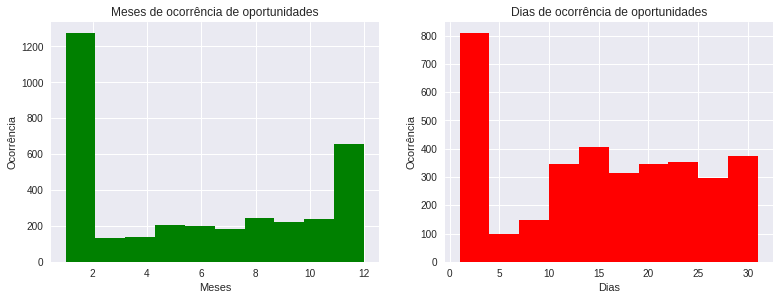

In [0]:
dias_oportunidades = pd.Series([i.day for i in amazon['posting_date']])
meses_oportunidades = pd.Series([i.month for i in amazon['posting_date']])

plt.rcParams['figure.figsize'] = (20,15)

plt.subplot(3, 3, 1)
meses_oportunidades.hist(color="green")
plt.title('Meses de ocorrência de oportunidades')
plt.xlabel('Meses')
plt.ylabel('Ocorrência')

plt.subplot(3, 3, 2)
dias_oportunidades.hist(color="red")
plt.title('Dias de ocorrência de oportunidades')
plt.xlabel('Dias')
plt.ylabel('Ocorrência')

plt.show()

# Transformando em um só dataframe




## Tratamento da coluna 'location'

Em ambos datasets, a coluna **location** possui valores com caracteres unicode de várias linguagens, o que torna mais dificultoso a criação de [expressões regulares](https://docs.python.org/3/howto/regex.html) para encontrar padrões nas strings. Uma abordagem mais direta foi utilizada para encontrar possíveis países, estados ou cidades poderiam ser encontrados descritos nesta coluna. A seguir uma tabela com os padrões encontrados ao observar os valores unicos desta coluna.

| Dataframe | Exemplo | Padrão |
|-:||-:|-:|
| df_amazon | 'us, nv, las vegas ' | 'cc, sc, cidade ' |
| df_amazon | 'ro, iaşi ' | 'cc, cidade ' |
| df_amazon | 'ca,   ' | 'cc,   ' |
| df_amazon | 'ca, on,   ' | 'cc, sc,   ' |
| df_amazon | 'mx, emex, mexico city ' | 'cc, ?, cidade ' |
| df_amazon | 'uk, n york, heslington ' | 'cc, ?, vila ' |
| df_google | 'dubai - united arab emirates' | 'cidade - país' |
| df_google | 'palo alto, ca, usa' | 'cidade, sc, país' |
| df_google | 'tel aviv-yafo, israel' | 'cidade, país' |
| df_google | 'singapore' | 'país' |
| df_google | 'mg, brazil' | 'sc, país' |

com "cc" sendo **country code** (código do país) e  "sc" sendo **state code** (código do estado).

### Função que trata a coluna 'location' do dataframe da google



In [0]:
# Dado uma string 'location' da coluna de mesmo nome do dataframe
# do google, retorna a terna (city, state, country) com os possíveis
# nomes de cidade, estado e país encontrados na string
def divide_location_google(location):
  # 'country'
  city, state, country = "", "", location
  
  # 'city - country'
  if location.find(' - ') != -1:
    # splitting location
    city, country = tuple(location.split('-'))
        
  # 'city, st, country'
  elif location.find(',') != -1:
    # splitting location
    split_loc = location.split(',')
    # if matches 'city, st, country'
    if len(split_loc) == 3:
      city, state, country = tuple(split_loc)
    else:
      country = split_loc[-1]
      # matches 'st, country'
      if len(split_loc[0]) == 2:
        state = split_loc[0]
      # matches 'city, country'
      else:
        city = split_loc[0]
  
  # removing initial and ending whitespaces
  city = city.lstrip(); city = city.rstrip();
  state = state.lstrip(); state = state.rstrip();
  country = country.lstrip(); country = country.rstrip();
  
  return city, state, country

# testing sample
sample = ["p0cíty níme - coíntry",
         "p1cíty-níme, ít, coíntry",
         "p2cití asd-níme, coíntry",
         "p3, coíntry",
         "p4cíuntry"]

# testing function
for s in sample:
  print(divide_location_google(s))

('p0cíty níme', '', 'coíntry')
('p1cíty-níme', 'ít', 'coíntry')
('p2cití asd-níme', '', 'coíntry')
('', 'p3', 'coíntry')
('', '', 'p4cíuntry')


### Função que trata a coluna 'location' do dataframe da amazon

In [0]:
# Dado uma string 'location' da coluna de mesmo nome do dataframe
# da amazon, retorna a terna (city, state, country) com os possíveis
# nomes de cidade, estado e país encontrados na string
def divide_location_amazon(location):
  city, state, country = "", "", ""
       
  if location.find(',') != -1:
    # splitting location
    split_loc = location.split(',')
    # if matches 'city, st, country'
    if len(split_loc) == 3:
      country, state, city  = tuple(split_loc)
    else:
      country, city = tuple(split_loc)
  
  # removing initial and ending whitespaces
  city = city.lstrip(); city = city.rstrip();
  state = state.lstrip(); state = state.rstrip();
  country = country.lstrip(); country = country.rstrip();
  
  return city, state, country

# testing sample
sample = ['us, nv, las vegas ',
         'ro, iaşi ',
         'ca,   ',
         'ca, on,   ',
         'de, standortuebergreifend']

# testing function
for s in sample:
  print(divide_location_amazon(s))

('las vegas', 'nv', 'us')
('iaşi', '', 'ro')
('', '', 'ca')
('', 'on', 'ca')
('standortuebergreifend', '', 'de')


## Juntando os datasets

In [0]:
# preparando df_amazon
df_amazon = amazon
# dropando coluna 'unamed:_0'
df_amazon = df_amazon.drop(['unnamed:_0', 'posting_date'], axis=1)
# adicionando coluna 'company'
df_amazon["company"] = 'amazon'
# adicionando coluna 'categry'
df_amazon['category'] = 'amazon_category'
# mudando coluna 'basic_qualifications' para 'minimum_qualifications'
df_amazon = df_amazon.rename(columns={'basic_qualifications':'minimum_qualifications'})
# criando colunas ['city','state','country'] a partir da coluna 'location'
df = pd.DataFrame(df_amazon['location'].apply(divide_location_amazon).tolist(),
                    columns=['city','state','country'])
df_amazon['city'], df_amazon['state'], df_amazon['country'] = df['city'], df['state'], df['country']

# preparando df_google
df_google = google
# mudando coluna 'responsibilities' para 'description'
df_google = df_google.rename(columns={'responsibilities':'description'})
# criando colunas ['city','state','country'] a partir da coluna 'location'
df = pd.DataFrame(df_google['location'].apply(divide_location_google).tolist(),
                    columns=['city','state','country'])
df_google['city'], df_google['state'], df_google['country'] = df['city'], df['state'], df['country']

# reordenando colunas
columns = ['company', 'title', 'category', 'location', 
                     'city', 'state','country', 'description', 
                     'minimum_qualifications', 'preferred_qualifications']
df_google = df_google[columns]
df_amazon = df_amazon[columns]

#concatenando
df_ga = pd.concat([df_google,df_amazon], ignore_index=True)

df_ga.shape[0] == df_google.shape[0] + df_amazon.shape[0]

True

## Transformando valores da coluna 'country' para código de 3 letras

### Dataset com código de países

In [0]:
# lendo dataset com códigos dos países
df_cc = pd.read_csv("country_code.csv", index_col=0)

# transformando letras das strings da coluna 'COUNTRY' para letras minusculas
df_cc['COUNTRY'] = df_cc['COUNTRY'].str.lower()
# renomeando colunas
df_cc.columns = ['country', '2cc', '3cc', 'N', 'D']
# dropando colunas irrelevantes
df_cc = df_cc.drop(['N', 'D'], axis=1)

df_cc.head()

,country,2cc,3cc
0,afghanistan,AF,AFG
1,albania,AL,ALB
2,algeria,DZ,DZA
3,american samoa,AS,ASM
4,andorra,AD,AND


### Função que traduz o código de 2 letras ou o nome de um páis para seu código de 3 letras

In [0]:
# retorna o codigo de três letras dado o código de 2 letras ou o nome de um páis
def to_3cc(name):
  #
  #
  # ESPECIAL CASES
  if (name == 'uk'): 
    return df_cc[df_cc['country'].str.contains('kingdom', case=False)].iloc[0]['3cc']
  if (name == 'russia'):
    return df_cc[df_cc['country'].str.contains('russia', case=False)].iloc[0]['3cc']
  if(name == 'czechia'):
    return df_cc[df_cc['country'].str.contains('czech', case=False)].iloc[0]['3cc']
  if(name == 'south korea'):
    return df_cc[df_cc['country'].str.contains('korea, republic', case=False)].iloc[0]['3cc']
  
  #
  #
  # OTHER CASES
  column_to_search = ""
  
  # two-letter code
  if len(name) == 2:
    column_to_search = '2cc'
    name = name.upper()
    
  # 3-letter code
  elif len(name) == 3:
    column_to_search = '3cc'
    name = name.upper()
    
  # country name
  else:
    column_to_search = 'country'
    #.iloc[0]['3cc']
  
  # search df
  result = df_cc[df_cc[column_to_search] == name]
  
  if result.empty:
    result = ""
  else:
    result = result.iloc[0]['3cc']
    
  
  return result
    

### Alterando o dataframe

In [0]:
# adicionando coluna com codigo de 3 letras
df_ga['3cc'] = df_ga['country'].apply(to_3cc)
# checando quantos países não foram traduzidos
df_ga[df_ga['3cc'] == '']['country'].unique()

array([''], dtype=object)

# Mapa da distribuição das vagas de TI pelo mundo

In [0]:
# extraindo o codigo(pais) da localizacao da amazon
amazonLocations = df_ga[df_ga["company"] == "amazon"]
code = amazonLocations.country

In [0]:
# contando a ocorrencia das vagas em cada pais
paises = {}

for i in code:
    if i.upper() in paises:
        paises[i.upper()] += 1
    else:
        paises[i.upper()] = 1

In [0]:
# adicionando a coluna de ocorrencia de vagas nos paises correspondentes/

qt_vagas = []

for i in (df_cc["2cc"]):
    found = False
    for key, value in paises.items():
        if key == i:
            found = True
            qt_vagas.append(value)
    
    if not found:
      qt_vagas.append(0)
      
df_cc["qt_vagas"] = qt_vagas
df_cc_existentes = df_cc[df_cc["qt_vagas"] > 0]
df_cc_existentes.tail()

,country,2cc,3cc,qt_vagas
204,south africa,ZA,ZAF,17
207,spain,ES,ESP,14
216,taiwan,TW,TWN,5
232,united arab emirates,AE,ARE,1
234,united states,US,USA,2867


Para que as cores do mapa ficassem com uma boa distribuição de cores, for necessário eliminiar um outlier do dataframe.

Os Estados Unidos possui a maior quantidade de vagas, porém esse valor é muiro exorbitante comparando com os outros paises. ** De 3493 vagas da Amazon, 2867 é só nos Estados Unidos.**

In [0]:
# removendo os estados unidos
amazonPaises = df_cc_existentes.drop(df_cc_existentes.index[22])
amazonPaises.tail()

,country,2cc,3cc,qt_vagas
198,singapore,SG,SGP,4
204,south africa,ZA,ZAF,17
207,spain,ES,ESP,14
216,taiwan,TW,TWN,5
232,united arab emirates,AE,ARE,1


In [0]:
# call everytime a new offline plot has to be done with plotly.
# from: https://stackoverflow.com/a/47230966
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
    <script>
      requirejs.config({
        paths: {
          base: '/static/base',
          plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
        },
      });
    </script>
    '''))

In [0]:
data = [ dict(
        type = 'choropleth',
        locations = amazonPaises["3cc"],
        z = amazonPaises['qt_vagas'],
        text = amazonPaises['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.3,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = 'Quantidade de vagas'),
      ) ]

layout = dict(
    title = 'Numero de vagas de trabalho na área de I.T por páis',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
    
py.offline.init_notebook_mode(connected=True)
configure_plotly_browser_state()
py.offline.iplot( fig, validate=False, filename='d3-world-map' )

## Atenção
O maior numero de vagas de TI é nos Estados Unidos (**USA**) com aproximadamente** 2867 vagas.**

## Top 5 paises com mais vagas de TI na Amazon

In [0]:
top5Amazon = amazonPaises.sort_values(by='qt_vagas', ascending=False).drop(["2cc","3cc"], axis=1)[0:5]
top5Amazon

,country,qt_vagas
38,canada,156
101,india,141
105,ireland,50
81,germany,38
107,israel,32


# Vagas de profissões que trabalham com dados

Considerando a disciplina de** Ciência de Dados I**, foi realizado uma analise sobre a quantidade de vagas para trabalhar com dados.

Como existem varias combinaços de nomenclaturas para essa área, o critério para selecionar as vagas sobre dados, foram as profissões cuja seu nome possuia a palavra **"data"** (dados em inglês).

### Vagas para trabalhar com Dados na **Amazon**

In [0]:
amazon = amazonLocations

#selecionando as linhas que cuja a vaga seja relacionada a trablhar com dados na Amazon
vagasDataAmazon = []
   
for i in amazon.title:
  if "data" in i:
    vagasDataAmazon.append(True)
  else:
    vagasDataAmazon.append(False)
    
    
amazon['data'] = vagasDataAmazon
vagasAmazon = amazon[amazon["data"]==True]

# contagem da distribuição de vagas sobre "data"
locationDataAmazon = {}

for i in list(vagasAmazon['3cc']): # NATALIA : alterado pra '3cc'
  if i in locationDataAmazon:
    locationDataAmazon[i] += 1
  else:
    locationDataAmazon[i] = 1
    

df = {'location': list(locationDataAmazon.keys()), 'vagas_data': list(locationDataAmazon.values())}
vagasDataAmazon = pd.DataFrame(data=df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Titulos das vagas relacionados a Dados


In [0]:
vagasAmazon.title.unique()

array(['software engineer- big data analytics, aws pinpoint',
       'software engineer, big data and analytics', 'sr. data engineer',
       'web development engineer - alexa data services',
       'aws database services sde, amazon redshift',
       'sr. data scientist - treasure truck',
       'sr. systems engineer with database experience',
       'prototyping data engineer',
       'software development engineer, horizon big data platform',
       'senior software development engineer – distributed database systems',
       'data engineer',
       'software development engineer – big data, amazon athena',
       'sr. sde / architect - amazon alexa data services',
       'software engineer - embedded network devices data plane',
       'senior software development engineer - search data and machine learning service',
       'software developer - deep learning & big data platform (aws ai)',
       'software development manager – big data, amazon emr',
       'software development en

#### Distribuição das vagas pos país

In [0]:
vagas = vagasDataAmazon
vagas

,location,vagas_data
0,USA,69
1,ZAF,2
2,SGP,1
3,IND,1
4,CAN,2
5,IRL,3
6,AUS,1


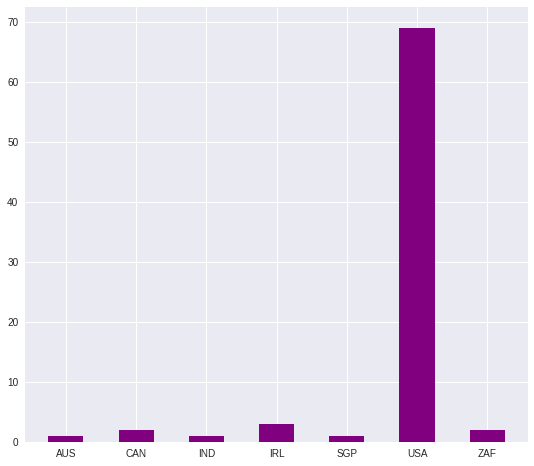

In [0]:
plt.rcParams['figure.figsize'] = (9,8)

plt.bar(list(vagas['location']),
        list(vagas['vagas_data']),
        width=.5, color='purple')
plt.show()

In [0]:
percent = vagas['vagas_data'].sum() * 100 / (amazon.shape[0])
print("Tota de vagas com a palavra 'data': " + str(vagas['vagas_data'].sum()))
print("equivalendo " + "{0:.2f}".format(percent) + "% do total.")

Tota de vagas com a palavra 'data': 79
equivalendo 2.26% do total.


## Vagas para trabalhar com Dados na **Google**

In [0]:
google = df_ga[df_ga["company"] == "google"]

#selecionando as linhas que cuja a vaga seja relacionada a trabalhar com dados na Google
vagasDataGoogle = []
   
for i in google.title:
  if "data" in i:
    vagasDataGoogle.append(True)
  else:
    vagasDataGoogle.append(False)
    
    
google['data'] = vagasDataGoogle
vagasGoogle = google[google["data"]==True]

# contagem da distribuição de vagas sobre "data"
locationDataGoogle = {}

for i in list(vagasGoogle['3cc']):
  if i in locationDataGoogle:
    locationDataGoogle[i] += 1
  else:
    locationDataGoogle[i] = 1
    

vagasDataGoogle = {'location': list(locationDataGoogle.keys()), 'vagas_data': list(locationDataGoogle.values())}
vagasDataGoogle = pd.DataFrame(data=vagasDataGoogle)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Titulos das vagas relacionados a Dados


In [0]:
vagasGoogle.title.unique()

array(['data analyst, product and tools operations, google technical services',
       'data analyst, consumer hardware',
       'program manager, supply chain data management',
       'big data product specialist, google cloud (english)',
       'program manager, geo data operations',
       'technical program manager, fiber network data',
       'technical program manager, data center design',
       'program manager, product data management',
       'strategic negotiator, data center',
       'mechanical engineer, data center',
       'customer experience data scientist, google cloud support',
       'data analyst, product trust and safety',
       'data insights analyst, trust and safety',
       'data analyst, trust and safety',
       'data analyst, smb sales growth programs, google cloud',
       'data science analyst, revenue strategy and operations, google marketing solutions',
       'product marketing manager, databases, google cloud',
       'data strategist, online partner

#### Distribuição das vagas por páis

In [0]:
vagas = vagasDataGoogle
vagas

,location,vagas_data
0,USA,20
1,ITA,1
2,SGP,1
3,SWE,1
4,GBR,1
5,NLD,1
6,IND,1
7,IRL,2
8,ISR,2


### Gráficos

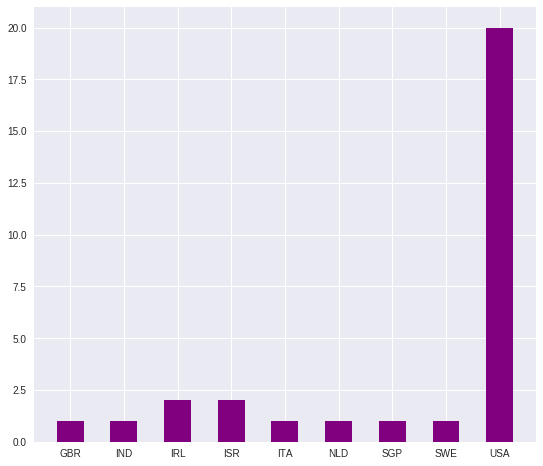

In [0]:
plt.bar(list(vagas['location']),
        list(vagas['vagas_data']),
             width=.5, color='purple')
plt.show()

In [0]:
percent = vagas['vagas_data'].sum() * 100 / (google.shape[0])
print("Tota de vagas com a palavra 'data': " + str(vagas['vagas_data'].sum()))
print("equivalendo " + "{0:.2f}".format(percent) + "% do total.")

Tota de vagas com a palavra 'data': 30
equivalendo 2.44% do total.


# Análise das qualificações do Google e Amazon

### Funções auxiliares

In [0]:
# retorna um df restrito a linhas que contenham
# uma palavra 'word' na coluna 'col'
def search_word(df, col, word):
  return df[df[col].str.contains(word, case=False)]

# Retorna uma df com a frequencia que uma palavra 'word'
# ocorreu em uma coluna 'col' de um df 'df_source'.
# Utiliza um regex 'word_re' para fazer a pesquisa
def get_freq_df(df_source, col, word, word_re):
  df = df_source
  df = search_word(df,col,word_re)
  df = df.groupby('3cc').count()
  df = df.drop(df.columns[1:], axis=1)
  df.columns = [word]
  df = df.reset_index(col_fill='3cc')
  
  # fill values
  for cc in df_source['3cc'].unique():
    if cc not in df['3cc'].tolist():
      df.loc[df.shape[0]] = [cc, 0]
  
  return df

# Retorna um dicionário cujos indices sao palavras da lista
# 'list_words' com respectivo regex em 'list_re',
# e com valores que sao df's de get_freq_df()
def freq_list(df_source, list_words, list_re, col):
  a_list = []
  for idx, word_re in enumerate(list_re):
    word = list_words[idx]
    a_list.append(get_freq_df(
        df_source,
        col,
        word, word_re))
  return a_list

# Dicionario com frequencia de lista de palavras indexado por coluna
def col_dict(df_source, selected_cols, list_words, list_re):
  column_dict = {}
  
  for col in selected_cols:
    df_freq_list = freq_list(df_source,list_words, list_re, col)

    # merge df from list
    df = df_freq_list[0]
    for df_freq in df_freq_list[1:]:
      if not df_freq.empty:
        df = df.merge(df_freq, on=['3cc'])
      
    column_dict[col] = df

  return column_dict

## Busca de palavras

Queremos saber a incidência de algumas palavras no dataset. Para isto, criamos listas de palavras para linguagens de programação, tecnologias que consideramos relevantes: [java,  javascript, python, scala, c++, perl, c, c#, php, javascript, ruby, scala]

#### Listas de palavras

In [0]:
# linguagens de programação
lang_words = ['java', 'javascript', 'python', 'scala',
               'c++', 'perl', 'c', 'haskell',
               'c#', 'php', 'ruby',
              ]
#regex para linguagens de programação
lang_re = [ r'\bjava\b', r'javascript', r'\bpython\b', r'\bscala\b',
             # java,  javascript, python, scala
             r'\bc\+\+\b', r'\bperl\b', r'\bc\b',
             #c++, perl, c
             'c#', r'\bphp\b', r'\bruby\b',
             #c#, php, ruby
             ]


#### Dicionário com ocorrencias de palavras

In [0]:
# colunas com bastante texto
text_cols = ['minimum_qualifications', 'preferred_qualifications',
                'description', 'title']

dict_lang = col_dict(df_ga, text_cols, lang_words, lang_re)

### Quanto as Qualificações Minimas e Preferidas



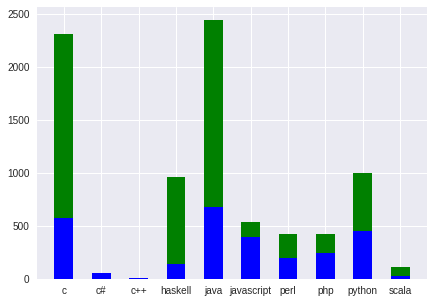

In [0]:
min_q = dict_lang['minimum_qualifications']

# df a com total de vezes que uma linguagem foi citada
max_vals_0 = min_q.sum()[1:].astype('int64').to_frame()
max_vals_0.columns = ['total']
max_vals_0 = max_vals_0.sort_values('total', ascending=False).reset_index()
max_vals_0.columns = ['language','total']
max_vals_0

pref_q = dict_lang['preferred_qualifications']

# df a com total de vezes que uma linguagem foi citada
max_vals_1 = pref_q.sum()[1:].astype('int64').to_frame()
max_vals_1.columns = ['total']
max_vals_1 = max_vals_1.sort_values('total', ascending=False).reset_index()
max_vals_1.columns = ['language','total']
max_vals_1

# plotting bar graph

plt.rcParams['figure.figsize'] = (7,5)
ax = plt.subplot(111)

ax.bar(list(max_vals_0['language']),
        list(max_vals_0['total']),
             width=.5, color='green',
      align='center')
ax.bar(list(max_vals_1['language']),
        list(max_vals_1['total']),
             width=.5, color='blue',
      align='center')
plt.show()

# Quais categorias de trabalho do Google/Youtube

In [0]:
# count: quantidadede vagas nolugar
# unique: tiposde vagas no lugar
# top: categoria com mais vagas
# freq: qt_vagasda 'top

dff_g = df_ga[df_ga['company'] != 'amazon']

df_cat = dff_g.groupby('category').describe()['3cc']
df_cat = df_cat.drop(['count','unique'], axis=1)
df_cat = df_cat.rename(columns={'top':'top_country'})
df_cat = df_cat.sort_values(by='freq', ascending=False)
df_cat.head(10)

,top_country,freq
category,,
marketing & communications,USA,90
finance,USA,84
business strategy,USA,81
user experience & design,USA,66
people operations,USA,56
program management,USA,48
sales & account management,USA,43
partnerships,USA,28
hardware engineering,USA,20


In [0]:
# count: quantidadede vagas nolugar
# unique: tiposde vagas no lugar
# top: categoria com mais vagas
# freq: qt_vagasda 'top'
dff_g = df_ga[df_ga['company'] != 'amazon']

df_gloc = dff_g.groupby('city').describe()['category']
df_gloc = df_gloc.sort_values(by='unique', ascending=False)
df_gloc.head(10)

,count,unique,top,freq
city,,,,
mountain view,190,20,marketing & communications,31
sunnyvale,155,18,finance,41
london,62,16,legal & government relations,9
new york,70,16,user experience & design,9
,53,15,sales & account management,9
san francisco,49,14,marketing & communications,17
sydney,31,12,sales & account management,7
shanghai,27,11,manufacturing & supply chain,10
dublin,87,11,sales & account management,42


# E no Brasil? 

In [0]:
df_brazil = df_ga[df_ga['3cc'] == 'BRA']
df_brazil.shape

(26, 11)

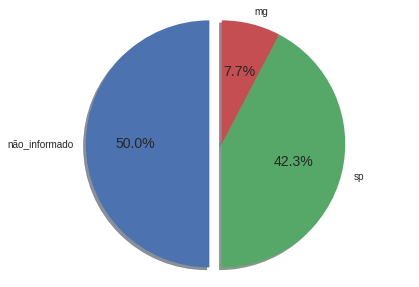

In [0]:
df_br_estados = df_brazil['state'].value_counts().to_frame().reset_index()
df_br_estados.columns = ['estado', 'total']
df_br_estados['estado'] = df_br_estados['estado'].replace("","não_informado")

# Pie chart
labels = list(df_br_estados['estado'])
sizes = list(df_br_estados['total'])
explode = (.1,0) + tuple([0 for i in range(len(df_br_estados['estado'])-2)])

plt.rcParams['figure.figsize'] = (7,5)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.rcParams.update({'font.size': 14})

plt.show()

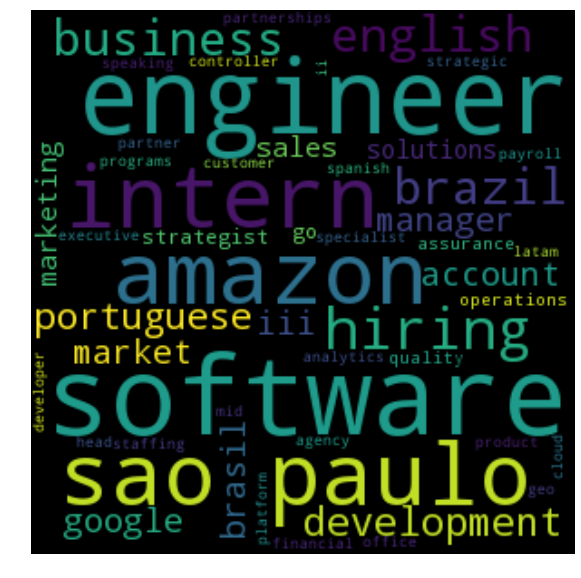

In [0]:
# title
plt.rcParams['figure.figsize'] = (10,10)
gen_wordcloud(df_brazil['title'].values)

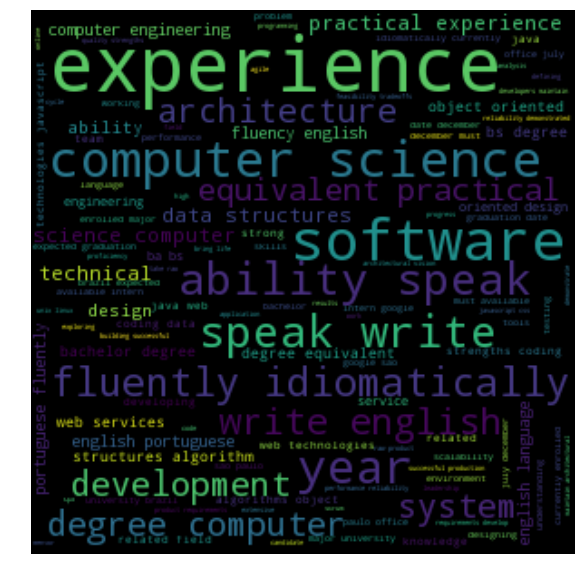

In [0]:
# minimum_qualifications
gen_wordcloud(df_brazil['minimum_qualifications'].values)

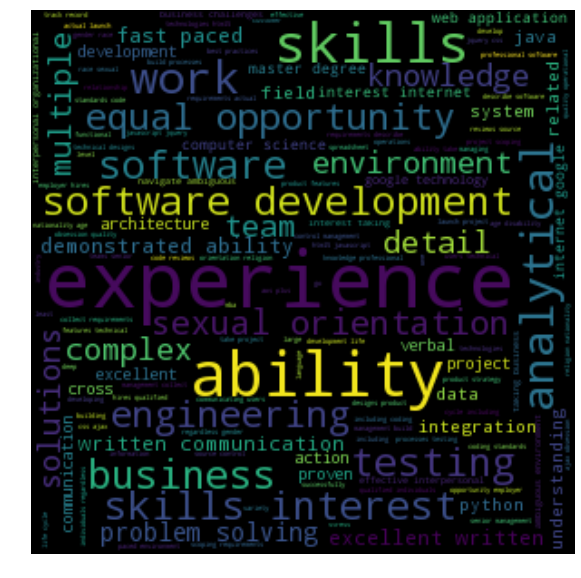

In [0]:
# preferred_qualifications
gen_wordcloud(df_brazil['preferred_qualifications'].values)

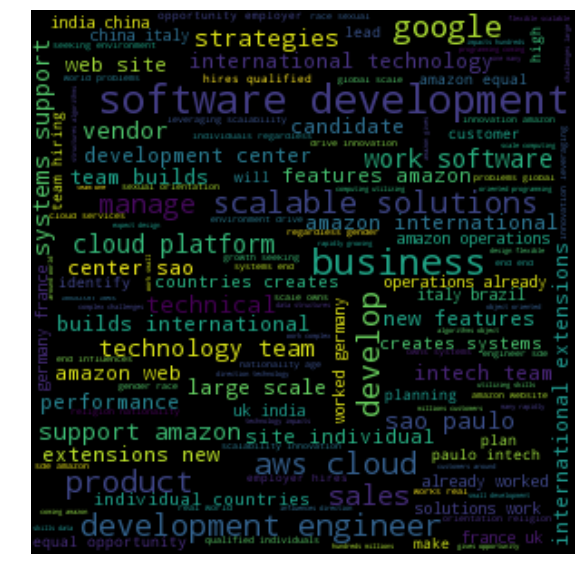

In [0]:
# description
gen_wordcloud(df_brazil['description'].values)